## Project Title: Visa For Lisa

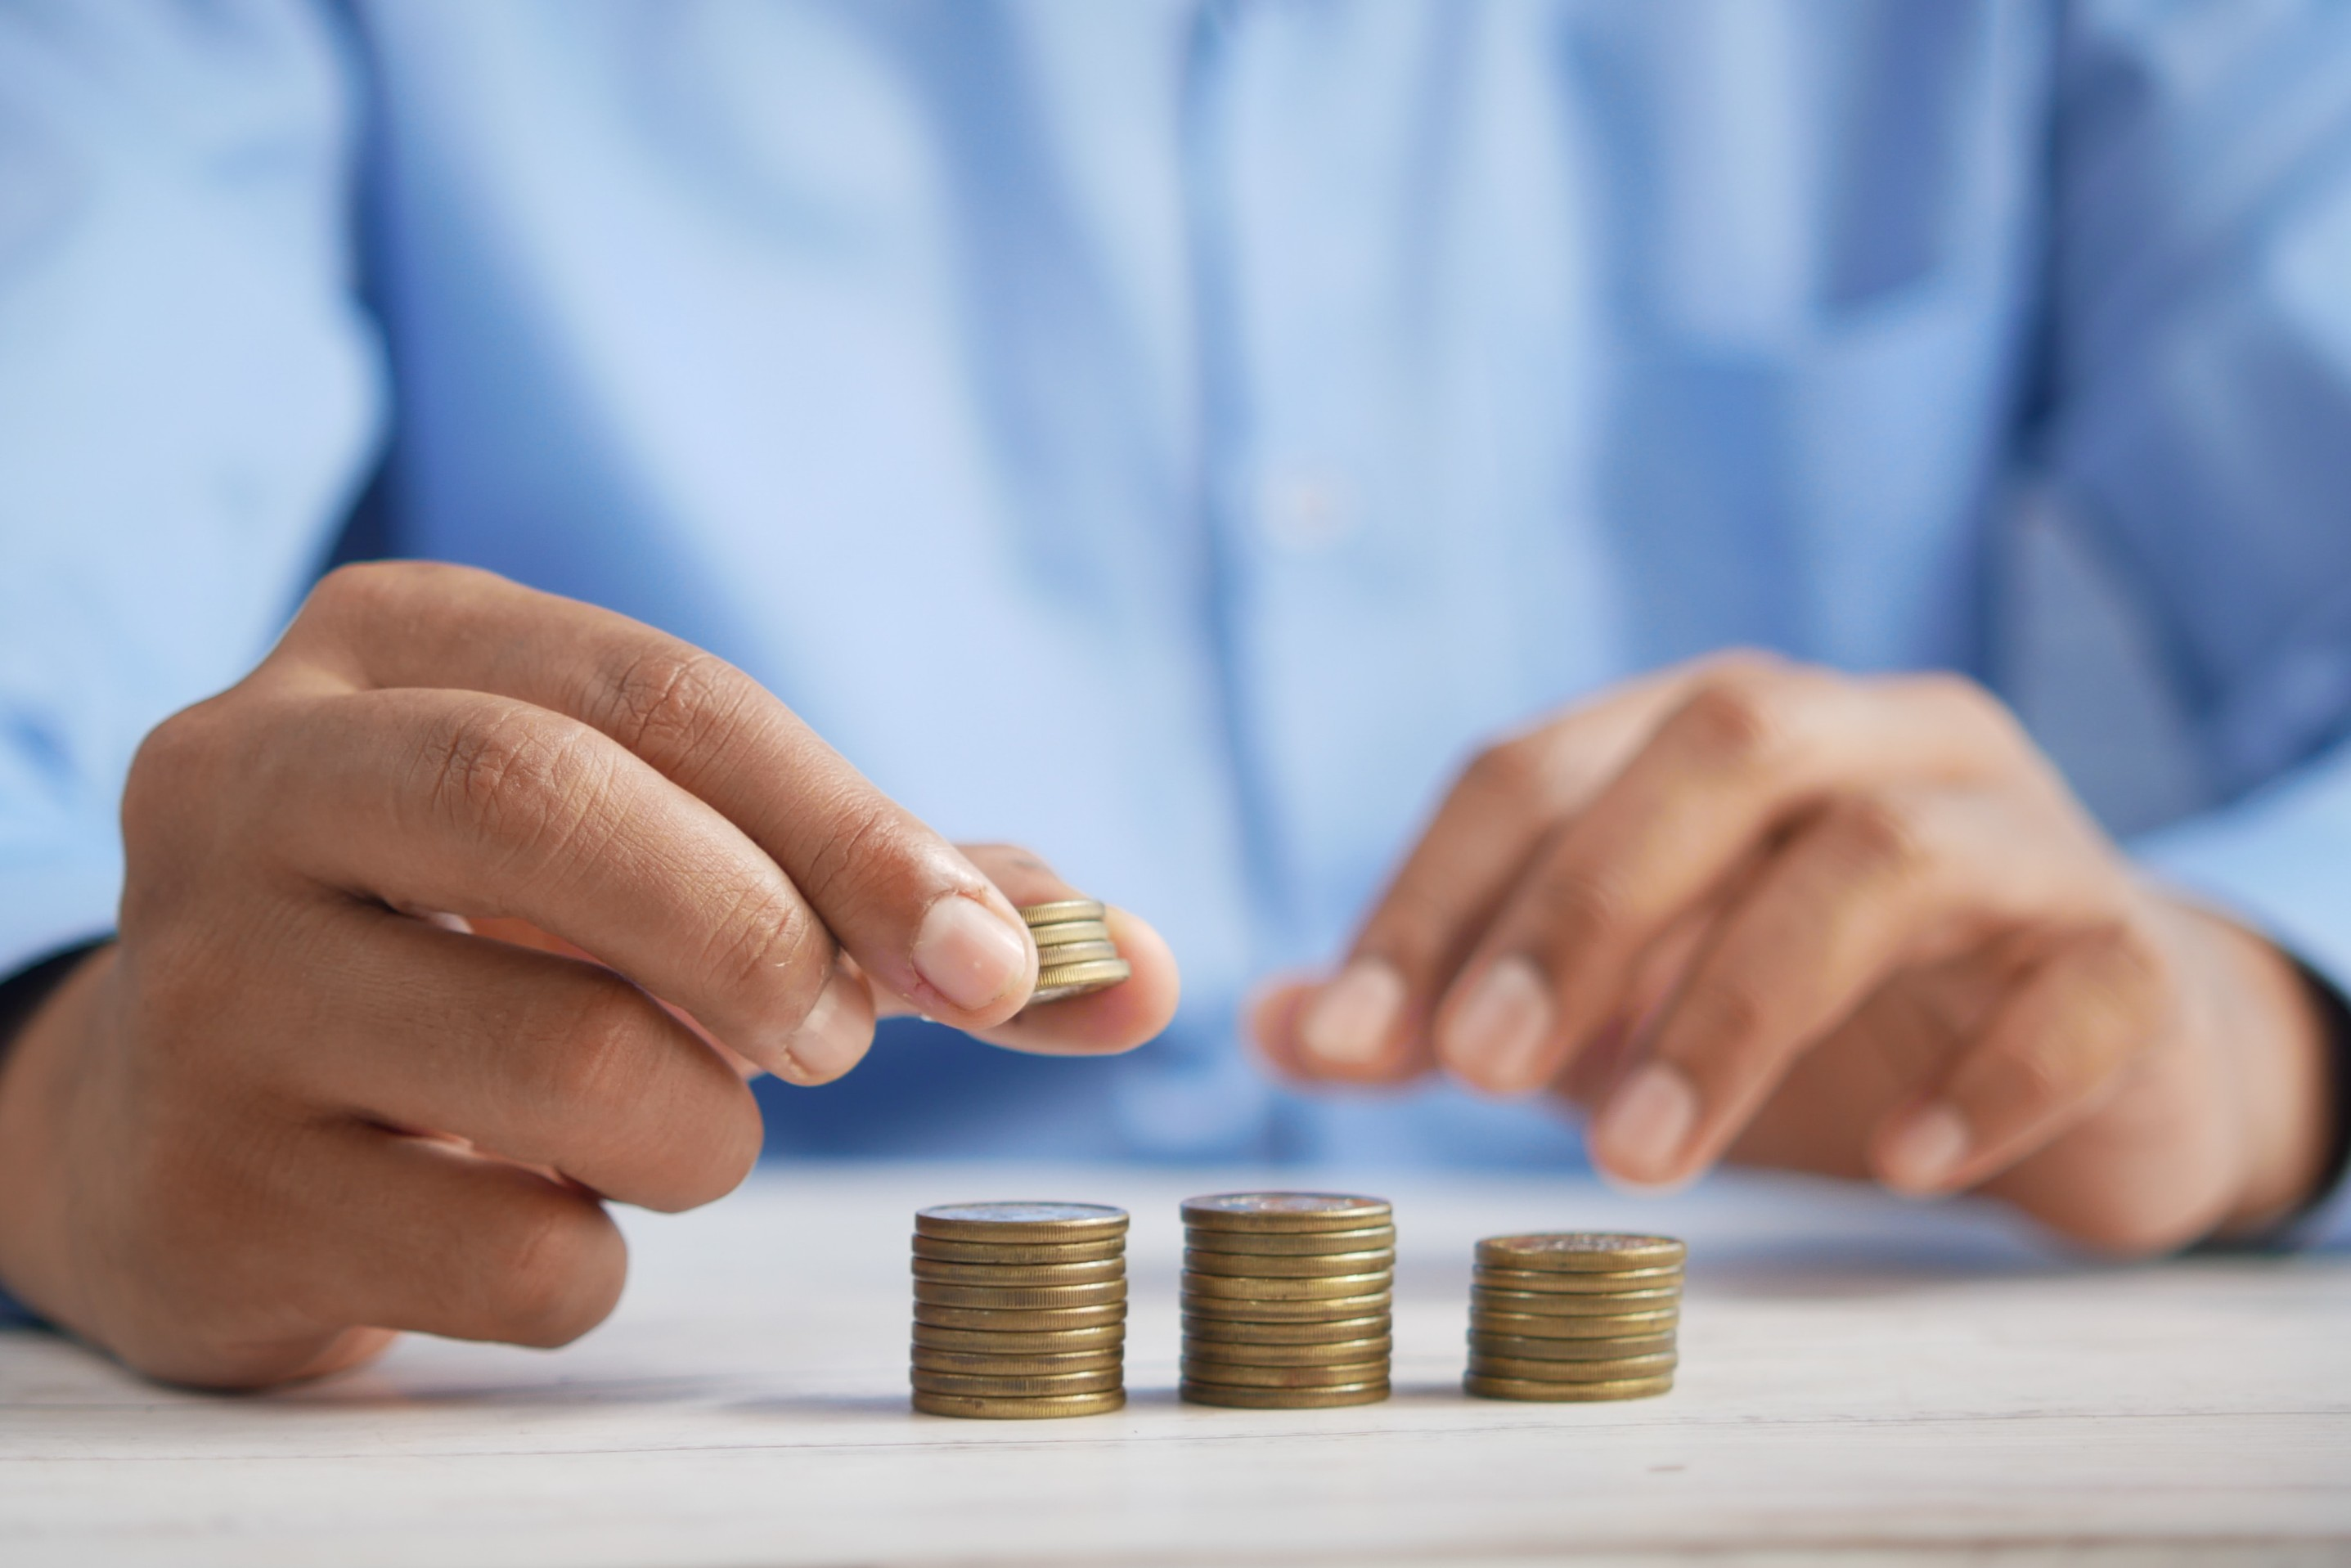

### Introduction
This project is about a bank (Galaxy Bank) whose management wants to explore converting some of its deposit customers to become personal loan customers (while retaining them as depositors). In short, they want to upsell customers to purchase more banking products from Galaxy Bank.

The bank has had some previous success in upselling to its deposit clients. Still, unfortunately, not all clients offered a loan by Galaxy Bank accept it and become a loan customers. The bank's campaign last year for its customers showed a healthy loan acceptance conversion rate of over 9%. This data has encouraged the marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

The bank wants to predict better and identify who will accept loans offered to potential loan customers. It will help make their marketing efforts more effective with higher conversion rates.

### About data

The dataset comprises more than 5000 unique clients' information from the Galaxy bank, encompassing several features of diverse customers that can be utilized for the analysis. The available features in this dataset are enumerated below.

* **Age**: The age of the customer in years.


* **Experience**: The number of years of professional experience the customer has.


* **Income**: The annual income of the customer in thousands of dollars.


* **ZIP Code**: The zip code of the customer's residence, which can be used to obtain geographic information about the customer's location.


* **Family**: The size of the customer's family, including the customer (e.g., 1 = single, 2 = married, 3 = three or more).


* **CCAvg**: The average credit card spending of the customer per month in dollars.


* **Education**: The level of education of the customer (e.g., 1 = undergraduate, 2 = graduate, 3 = advanced/professional).


* **Mortgage**: The total amount of mortgage owed by the customer in thousands of dollars.


* **Personal Loan**: Whether or not the customer has taken out a personal loan (1 = yes, 0 = no).


* **Securities Account**: Whether or not the customer has a securities account with the bank (1 = yes, 0 = no).


* **CD Account**: Whether or not the customer has a certificate of deposit (CD) account with the bank (1 = yes, 0 = no).


* **Online**: Whether or not the customer uses online banking services (1 = yes, 0 = no).


* **CreditCard**: Whether or not the customer has a credit card with the bank (1 = yes, 0 = no).

**Installing all neccessary Libraries used in this project**

In [1]:
# installing numpy
# !pip install numpy

# install pandas 
# !pip install pandas

# install seaborn and matplotlib
#!pip install matplotlib.pyplot as plt
#!pip install seaborn

# install sklearn
#!pip install sklearn


**Import necessary Libraries**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Part 1: Data Collection/Cleaning



In [3]:
# loading in the data
data = pd.read_csv('Visa_For_Lisa_Loan_Modelling.csv')

### Part 2: Data Exploration

I will start by taking a look at the data 

In this section, we will be placing emphasis on conducting essential data preparation techniques such as Data Cleaning, Formatting, and Feature Engineering to obtain a clean and structured dataset that is amenable to comprehensive analysis.

In [4]:
# displaying the first five rows
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# checking the shape of the data
data.shape

(5000, 14)

It can be observed that the dataset comprises 5000 distinct instances of information, encompassing 14 diverse attributes for analysis. Just to be sure, we will be checking for duplicate values in the data.

In [6]:
data.duplicated().sum()

0

So there are not duplicated rows in the data.

In [7]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Upon initial inspection of the statistics, it appears that there are no missing values present in the dataset. However, further investigation will be conducted to validate this observation.

In [8]:
# checking the formats of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All 14 columns in the dataset are numerical, comprising of 13 columns with data type int64 and 1 column with data type float64.

**Norminal/ Ordinal data.**


In [9]:
data['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIP Code, Length: 467, dtype: int64

Given the large number of unique zip codes in the dataset, which amounts to 467, it may be challenging to identify any patterns within each individual zip code. To facilitate the analysis, the first two digits of each zip code will be extracted and considered instead. This new column would be called **Region**

In [10]:
# Extracting the first two digits from zip code
data['Region'] = data['ZIP Code'].apply(lambda x: str(x)[:2]).astype('int')
data.Region.value_counts()

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: Region, dtype: int64

From the results, we can see that the majority of clients in the dataset are from region 94, with 1472 clients. Region 92 and 95 also have a relatively high number of clients, with 988 and 815 clients respectively. On the other hand, region 96 has the lowest number of clients with only 40 clients in the dataset.

In [11]:
# display 5 sample rows from the mortgage column
data['Mortgage'].sample(5)

1573    184
3372    209
1768     84
1088      0
3867      0
Name: Mortgage, dtype: int64

The **Mortgage** column records the aggregate amount of mortgage owned by each client. However, for the purpose of this analysis, I will generate a new binary feature that indicates whether a client has an active mortgage or not, irrespective of the actual amount of mortgage owned.

In [12]:
# creating a new column that checks if a client own a Mortgage or not
data['Own Mortgage'] = data['Mortgage'].apply(lambda x: 1 if x > 0 else x)
data['Own Mortgage'].value_counts()

0    3462
1    1538
Name: Own Mortgage, dtype: int64

Based on the results, it can be inferred that a substantial proportion of the dataset, specifically **69%**, does not have a mortgage.

In [13]:
# displaying the unique values in the Experience column
data['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

Upon inspection of the Experience column, it was observed that negative values were present. Given that experience is measured in years and negative experience is not possible, it can be inferred that these values may be errors. Therefore, a decision was made to replace these negative values with 0, indicating that the clients have no valid experience in the relevant field.

In [14]:
# replacing the negative values with 0
data.Experience = data.Experience.apply(lambda x: 0 if x < 0 else x)
data.Experience.value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
17    125
27    125
34    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
0     118
33    117
13    117
11    116
37    116
36    114
4     113
21    113
31    104
12    102
38     88
2      85
39     85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [15]:
# checking the distribution of the Personal Loan column
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

The personal loan column represents the dependent variable we will be predicting in this project. It is important to note that the data is highly imbalanced, with only **9.6%** of the total data indicating that the loan offer was accepted.

In [16]:
# checking the distribution of the Securities Account column
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

This feature exhibits imbalance as only slightly over **10%** of the total clients have a securities account.

In [17]:
# checking the distribution of the Securities Account column
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

The value_count of the Online column shows that 2984 clients in the dataset used online banking, while 2016 did not.

In [18]:
# checking the distribution of the Credit Card column
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

The value counts of the Credit Card column show that only **42** of the clients uses a credit card

**Continous data**

Taking a look at the columns with continous datatypes

In [19]:
# using the describe method to check the statistic of each column
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Region,Own Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,92.799000,0.307600
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.701052,0.461546
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,90.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,91.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,93.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,94.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,96.000000,1.000000


This shows some interesting information for the analysis, including:

**Age**: A mean of 45 and a standard deviation of 11 implies that the data has a normal distribution with a peak around 45, and that the values in the dataset are relatively close to the mean with a spread of 11 units. Additionally, it indicates that the data is relatively normally distributed, as the standard deviation is not too large compared to the mean. The data also ranges from 23 to 67

**Experience**: With maximum experience to be 43 years and minimum to be 0. Having a mean value of 20 and a standard deviation tells that the value is a bit spread out.

**Income**: A mean value of 73 and a standard deviation of 46 imply that the data has a wide spread and a high degree of variability. A range of 8 to 224 also implys that the data is widely spread.


**CCAvg**: The mean of 1.937938 and standard deviation of 1.747659 implys that the data are clusttered together

**Mortgage**: The large standard deviation of 101 suggests that there are some extreme values or outliers in the dataset that are skewing the distribution.

### Part 3: Data Visualization


As a data scientist, I recognize the value of visualization in exploring data and identifying patterns. To commence the analysis, I will generate a correlation heatmap to examine the relationships between various features in the dataset.

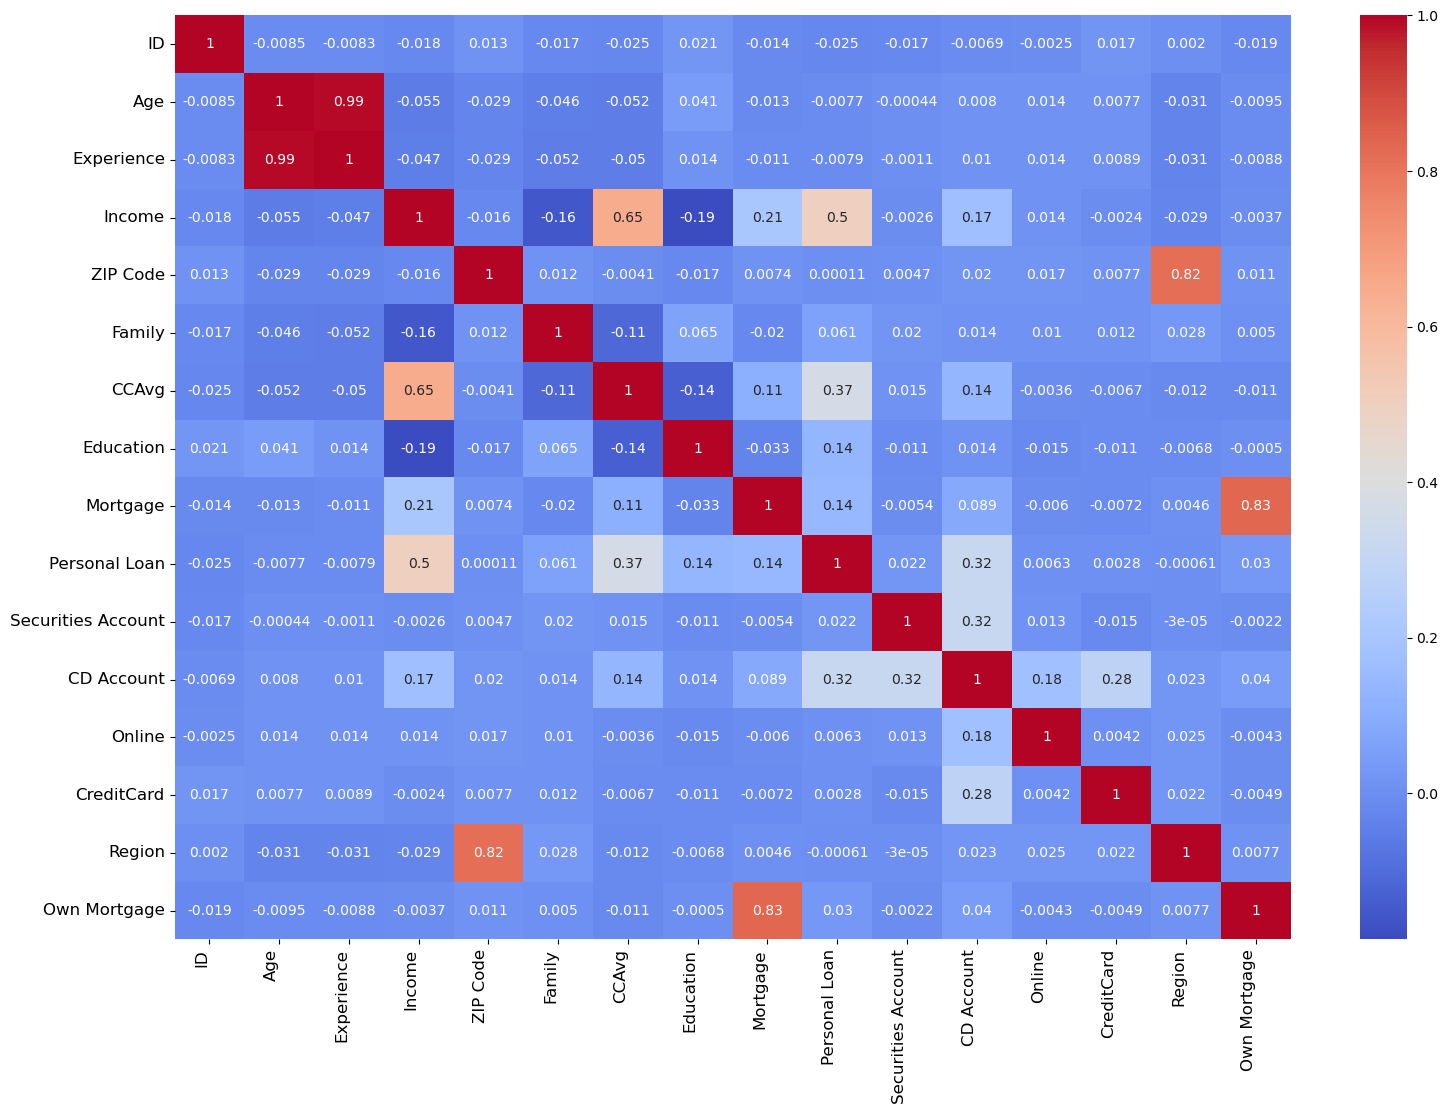

In [20]:
# plotting a heatmap using seaborn
corr = data.corr()
plt.figure(figsize = (18, 12))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.xticks(horizontalalignment='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Some notable correlations:
* Age and Experience (Positive): This is a very obvious one, as the older you get, the more experience you amass

* Income and Personal (Positive): There is a correlation value of 0.5 which implies that the higher the income, the higher the chnaces of accepting loan proporsal

* Income and CCAvg (Positive): This is also obvious and the more you earn, the higher your credit limit.

* CCAvg and Personal Loan (Positive): Albeit not a strong corrrelation but there is a form of relationship between the average Creditcard spend and Personal Loan.

* Mortgage and Own Mortgage (Positive): There is a high correlation between these two, but it is expected as the latter was gotten from the former. Further down the analysis, I will know which of them to drop from the data

The heatmap also reveals some additional correlations, although they may not be significant. However, we can keep them in mind for further analysis.

Let's explore the data through graphical representations

I will begin by checking the distribution of the data, I will also split the data into categorical(Ordinal and Norminal data) features and continous features and then visualize them appropriately to understand them further

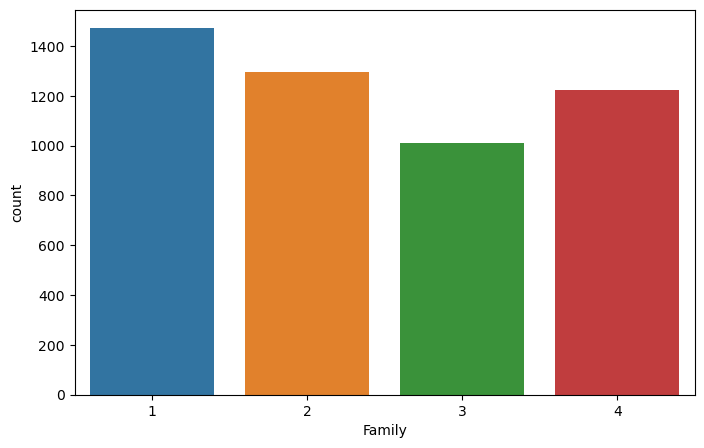

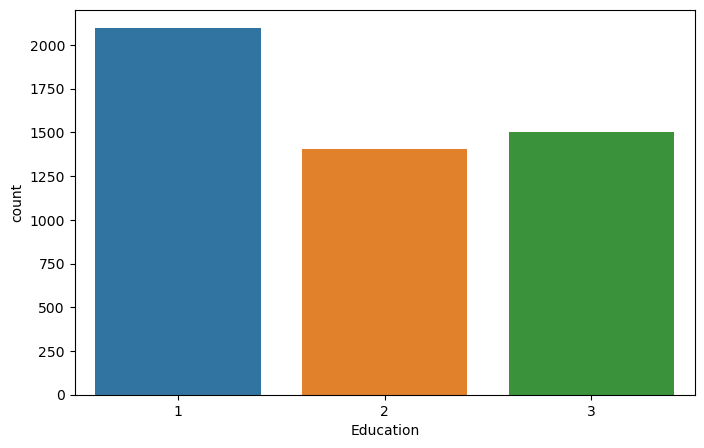

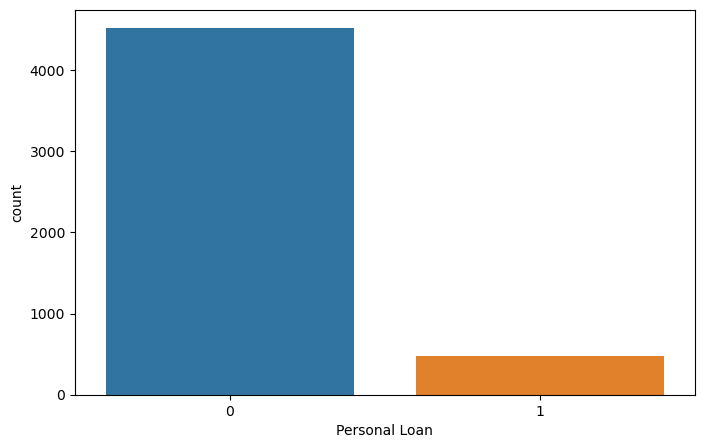

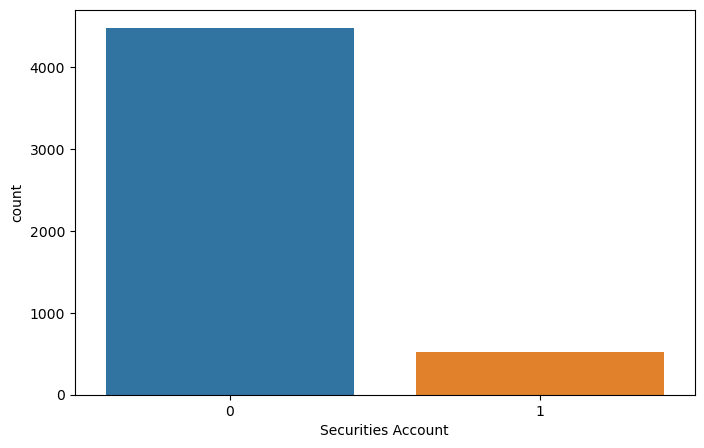

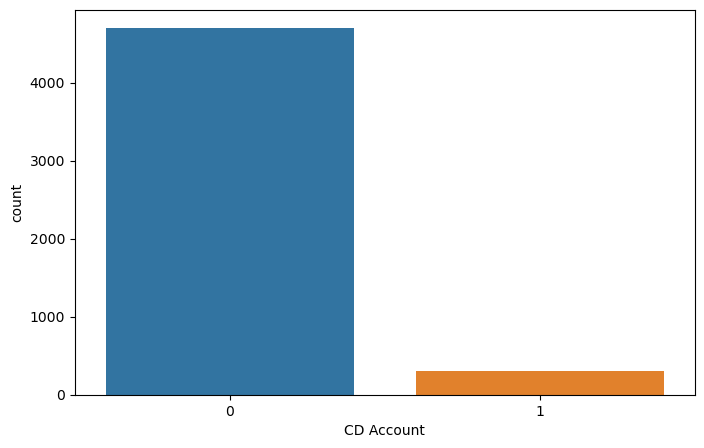

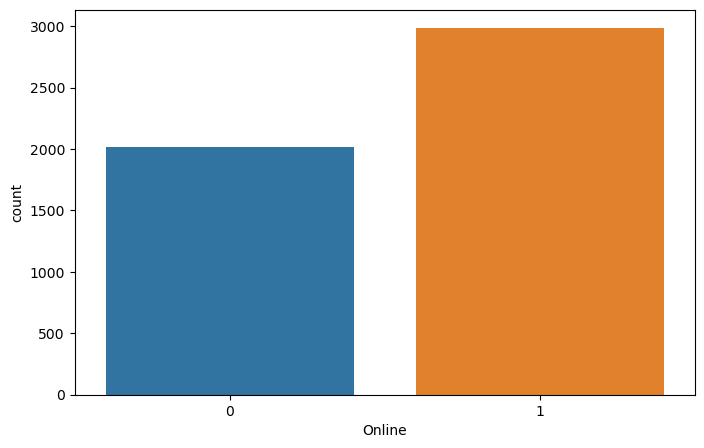

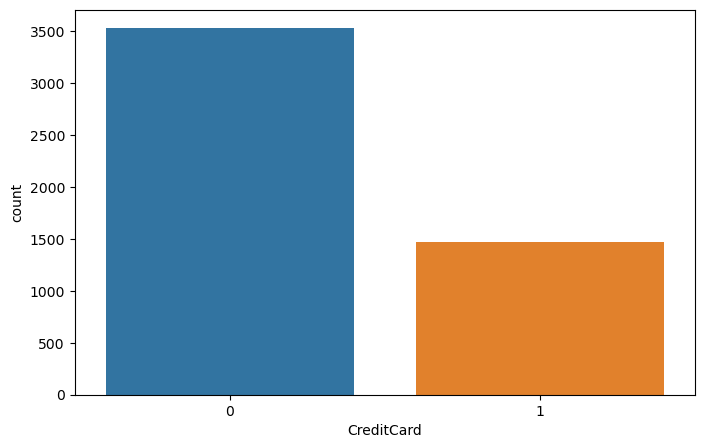

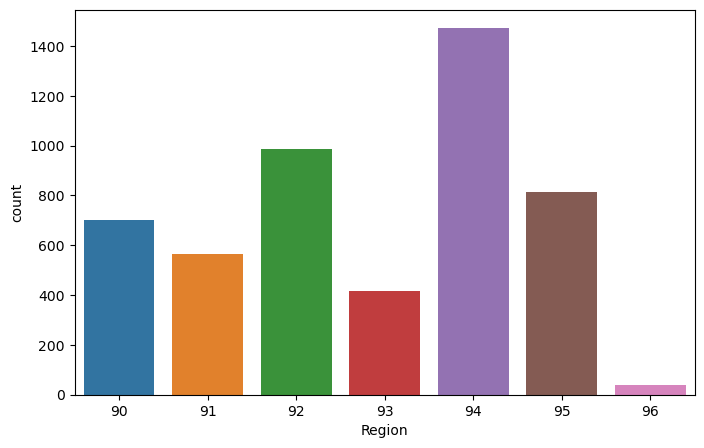

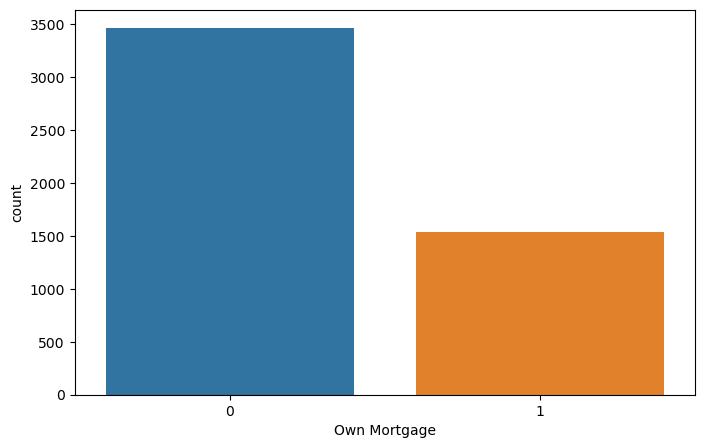

In [21]:
# collecting the categorical columns
cat = [col for col in data.columns if data[col].nunique() < 10]

# using a for loop to visualize each categorical col
for col in cat:
    plt.figure(figsize = (8, 5))
    sns.countplot(data = data, x = col)
    plt.show()

**Insights**
* Family: Although the distribution of the family column appears to be relatively random, it is worth noting that families with a size of 1 make up the largest proportion of the data at 29%, which is higher than any other family size.

* Education: Similarly, the distribution of education level among the bank's clients appears to be random, but it is noteworthy that the majority of clients have an education level of 1, accounting for 41% of the total number of clients.

* Online: The plot depicting the usage of online banking reveals that most customers utilize this service. However, the disparity between the number of customers using it versus those who do not is not significant. Therefore, caution must be exercised when drawing conclusions and making decisions based on this observation.

* CreditCard: The plot indicates that the majority of the customers have a CreditCard, with over 70% of the entire dataset.

* Region: The purpose of creating the Region column is to identify any pattern among clients with the same first two digits in their zip codes. The analysis reveals that a large proportion of the bank's customers have zip codes starting with 92, while the lowest number of clients have zip codes starting with 96.

* The columns for Personal Loan, Securities Account, and CD Account all show an imbalance in the data, with the majority of clients not having a loan or account..

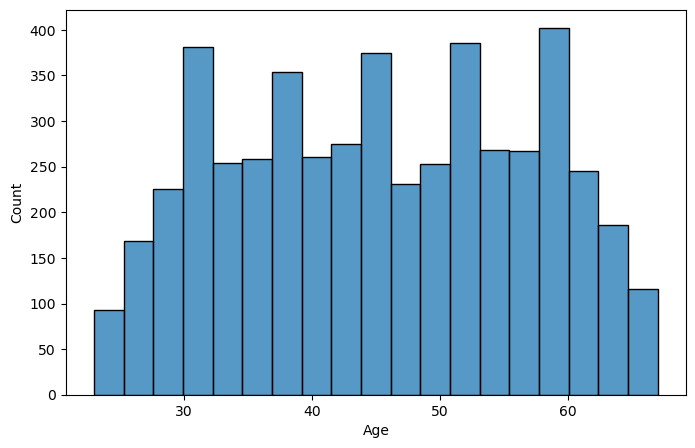

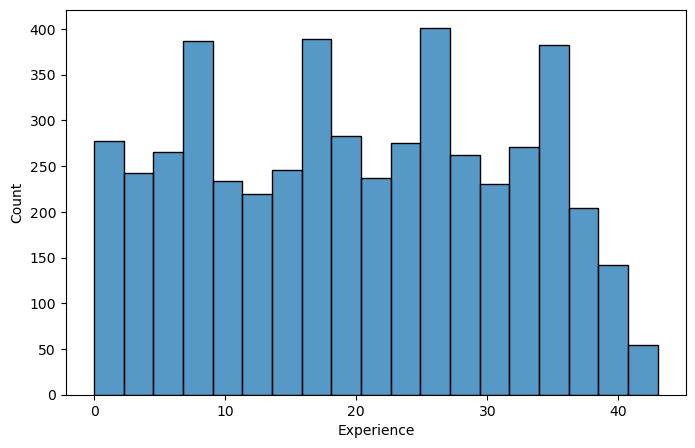

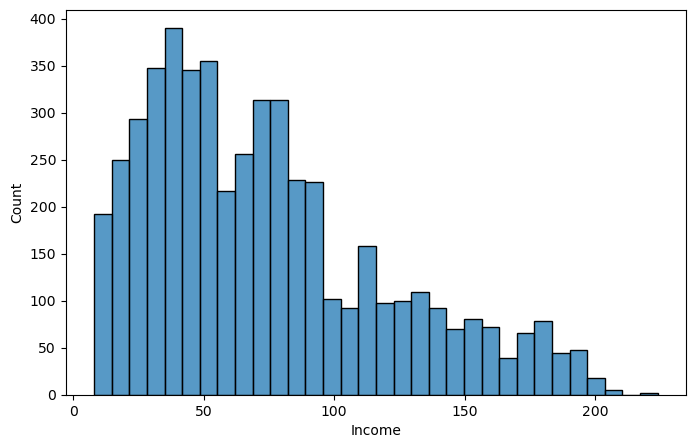

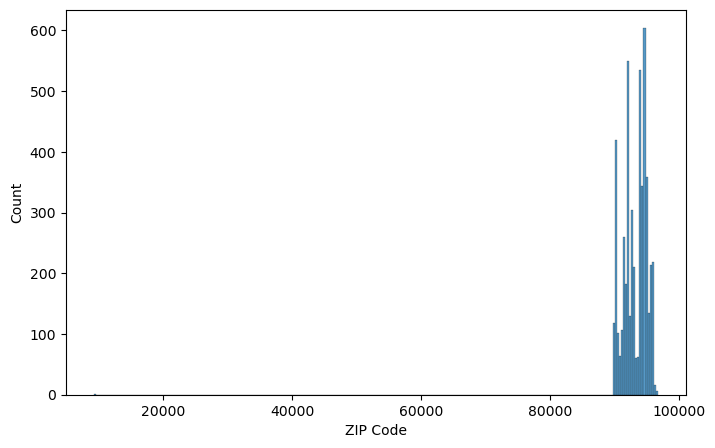

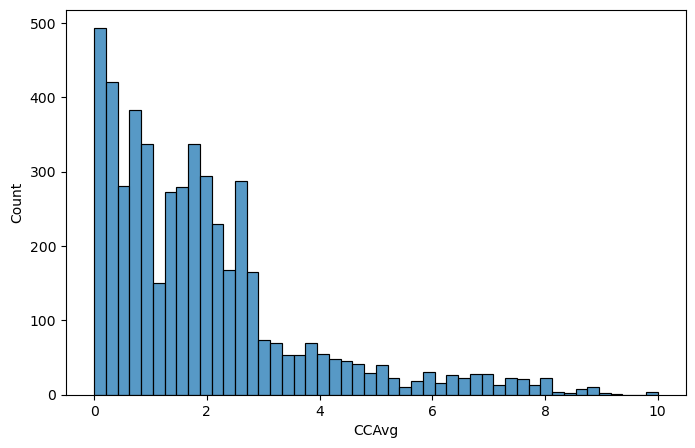

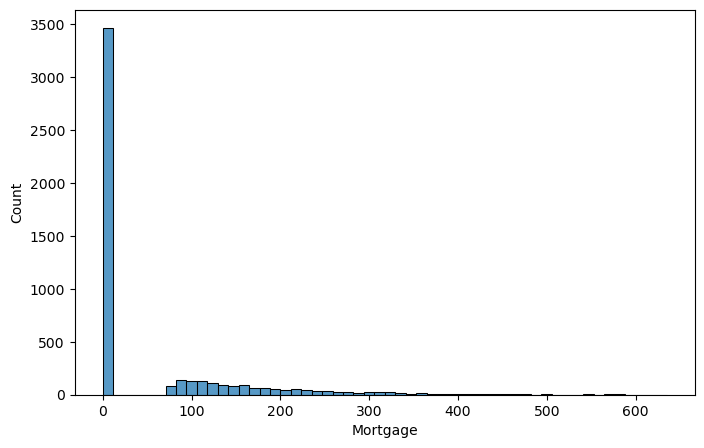

In [22]:
# collecting the continous data 
con = [col for col in data.columns if col not in cat ]

# using a for loop to visualize the continous data

for col in con:
    if col != 'ID':
        plt.figure(figsize = (8, 5))
        sns.histplot(data = data, x = col)
        plt.show()

**Insights**

* The **Age** and **Experience** columns exhibit a normal distribution pattern, indicating that they do not require any further manipulation or adjustment for analysis purposes.

* The **Income** and **CCAvg** columns exhibit a left-skewed distribution, suggesting the presence of outliers or extreme values in the data. Applying a log transformation to these columns may be appropriate, depending on the choice of classifier, to achieve a more normal distribution.

* The Mortgage column also exhibits a left skew, but with a high number of 0 values, suggesting that a significant proportion of customers do not have a mortgage.

### Part 4: Machine Learning

In [23]:
# creating a function for fitting the classifier and also return the classifier performance
def predict(clf, X, y):
    #split the model into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
    # Train the model
    clf.fit(X_train, y_train)
    
    #predicting the test class
    pred = clf.predict(X_test)
    
    # Test the model
    score = clf.score(X_test, y_test)
    print("Accuracy:", score)
    
    # checking the classification report
    report = classification_report(y_test, pred)
    print(report)
    
    # checking the confussion matrix
    matrix = confusion_matrix(y_test, pred)
    print(matrix)

    # Visualize the confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(matrix, cmap='Blues')

    # Add title and axis labels
    ax.set_title(f'Confusion Matrix for {clf}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    # Add axis ticks and tick labels
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(['Positive', 'Negative'])
    ax.set_yticklabels(['Positive', 'Negative'])

    # Add annotations to the plot
    thresh = matrix.max() / 2
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f'{matrix[i, j]}', ha='center', va='center',
                    color='white' if matrix[i, j] > thresh else 'black')

    plt.show()


In [24]:
# splitting the data into train and test sets
X = data.drop(['ID', 'Personal Loan', 'ZIP Code'], axis = 1)
y = data['Personal Loan']

# defining the class weights to mitigate the problem of BIAS
class_weights = {0:0.9, 1: 0.1}

**DECISION TREE CLASSIFIER**

Accuracy: 0.988
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1140
           1       0.94      0.93      0.93       110

    accuracy                           0.99      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.99      0.99      0.99      1250

[[1133    7]
 [   8  102]]


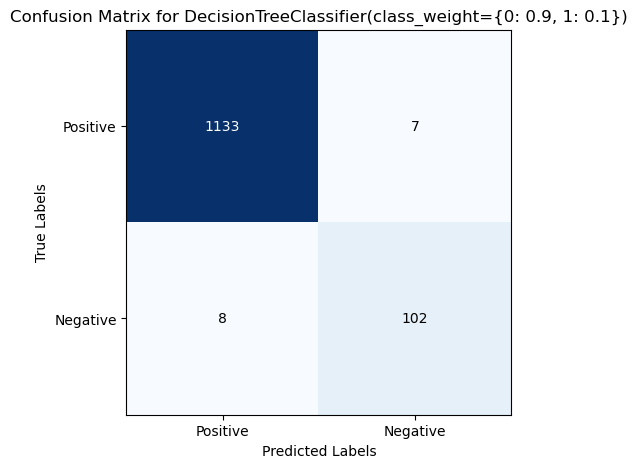

In [25]:

clf = DecisionTreeClassifier(class_weight = class_weights)
predict(clf, X, y)

**Report**

This classification report shows that the model has a high level of accuracy with an accuracy score of 0.9872. The precision for class 0 is 0.99, which means that out of all the samples predicted as class 0, 99% are actually class 0. The recall for class 0 is also 0.99, which means that out of all the actual samples that are class 0, 99% are correctly predicted as class 0. Similarly, the precision and recall for class 1 are 0.93. The F1 score for both classes is also high, indicating good overall performance.

Therefore, based on this report, the classifier seems to be performing well and is able to accurately classify most of the samples.

**RANDOM FOREST CLASSIFIER**

Accuracy: 0.9912
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1140
           1       1.00      0.90      0.95       110

    accuracy                           0.99      1250
   macro avg       1.00      0.95      0.97      1250
weighted avg       0.99      0.99      0.99      1250

[[1140    0]
 [  11   99]]


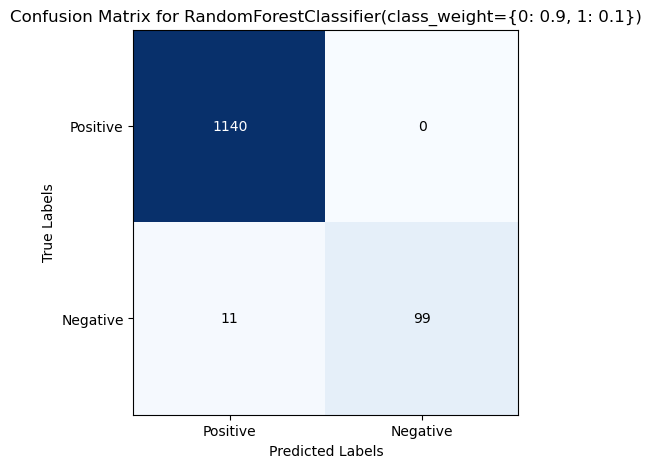

In [26]:
# instantiating the Random Forest Classifier
rfc = RandomForestClassifier(class_weight = class_weights)

# fitting the classifier and the printing it's performance
predict(rfc, X, y)

**Report**

Based on this classification report, the classifier seems to be performing well with an accuracy of 0.9896. The precision for class 1 (those who accepted the personal loan offer) is 1.00, which means that all the instances classified as class 1 are indeed positive. The recall for class 1 is 0.88, which means that out of all the positive instances, the classifier correctly classified 88% of them. The F1-score for class 1 is 0.94, which is a harmonic mean of precision and recall, indicating a good balance between the two metrics. The macro-average F1-score is 0.97, indicating that the classifier is performing well overall.

**Logistic Regression**

Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1140
           1       0.84      0.56      0.67       110

    accuracy                           0.95      1250
   macro avg       0.90      0.78      0.82      1250
weighted avg       0.95      0.95      0.95      1250

[[1128   12]
 [  48   62]]


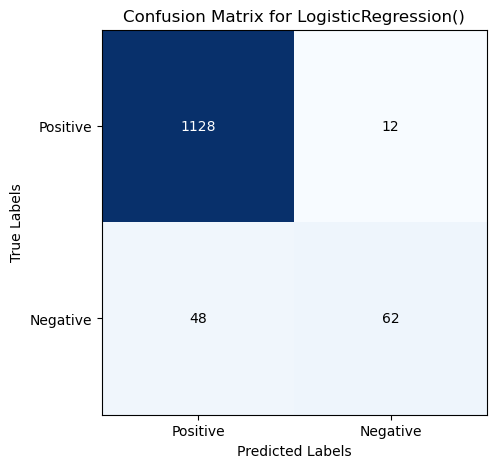

In [27]:
# defining a function for scaling my data 
def scale_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# scaling the data
X_scaled = scale_data(X)

# instantiating the classifier
lr = LogisticRegression()

# fitting and prediction
predict(lr, X_scaled, y)

**Report**
Model accuracy is 0.952, indicating correct predictions for 95.2% of the test data. Precision for class 0 is 0.96 and for class 1 is 0.84, while recall for class 0 is 0.99 and for class 1 is 0.56. F1 scores are 0.97 for class 0 and 0.67 for class 1. The model performs well in identifying class 0 with high precision, recall, and F1 score. However, it struggles with class 1, especially in recall and F1 score, indicating the need for improvement in identifying class 1.

As a data scientist, our goal is to accurately predict clients who will accept a loan offer. However, based on the results of this classifier, it is not performing well in correctly predicting the positive class. Therefore, it is not a good model for our purpose.

**SVC**

Accuracy: 0.9752
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1140
           1       0.99      0.73      0.84       110

    accuracy                           0.98      1250
   macro avg       0.98      0.86      0.91      1250
weighted avg       0.98      0.98      0.97      1250

[[1139    1]
 [  30   80]]


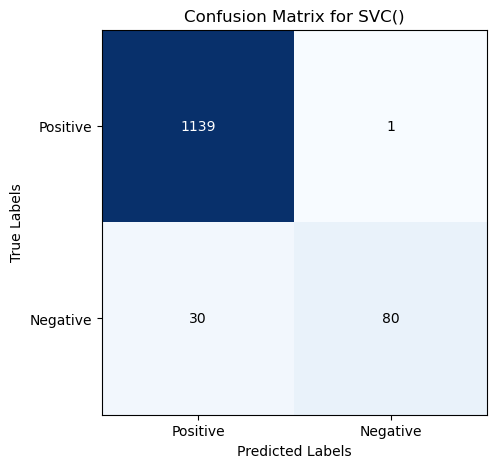

In [28]:
# instantiating the classifier
svc = SVC()

# fitting and prediction
predict(svc, X_scaled, y)

**Report**
This classifier achieved an accuracy of 0.9752 and performed well in predicting both classes with high precision and F1 scores. However, it struggled with the recall for the positive class, indicating that it may be better at identifying the negative class. 

Therefore, it may not be suitable for the purpose of this project, which aims to predict the positive class.

After evaluating four classifiers, it appears that **SVC** and **Logistic Regression** perform poorly in predicting the positive class, and are therefore not suitable for our project. On the other hand, **Random Forest** performs well in predicting the positive class, but **Decision Tree Classifier** outperforms it with an accuracy of over 93% compared to 86%. Therefore, I have decided to use Decision Tree Classifier and further improve its accuracy by tuning its hyperparameters.

**Feature Importance**

Here, I will examine the feature importance to determine which feature(s) to focus on.

In [29]:
def check_feature_importance(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
    clf.fit(X_train,y_train)
    
    importance = clf.feature_importances_
    return importance

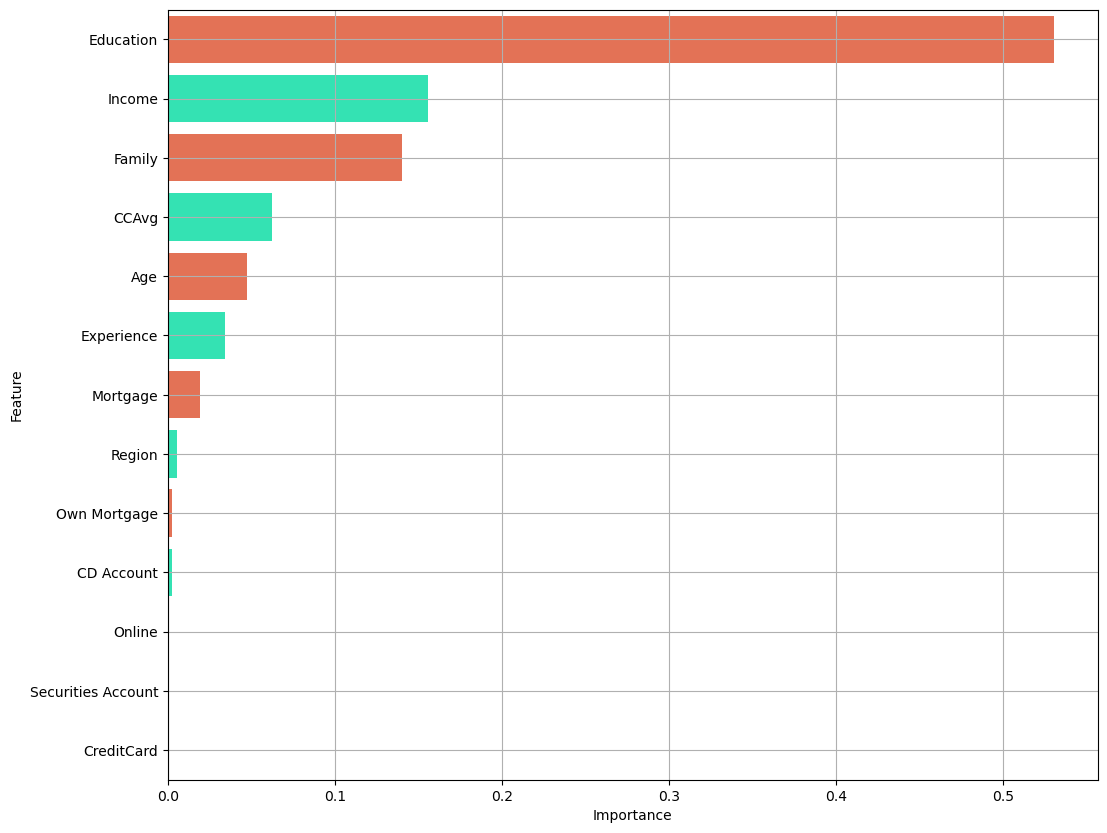

In [60]:
# checking for feature importances for the predictive model
imp = check_feature_importance(clf, X, y)
feature_names = X.columns


df = pd.DataFrame({'Feature':feature_names, 'Importance': imp})
df = df.sort_values(by = 'Importance', ascending = False)

# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=df, color='skyblue', palette = colors)
#plt.title('Feature Importances')
plt.grid()
plt.savefig("images/feature_importance.png", tight_layout = True)
plt.show()

After examining the data, it is evident that certain features such as Education, Income, Family size, Age, CCAvg, Experience, and Mortgage have a significant impact on predicting the correct class. In contrast, the remaining features have minimal impact on prediction and may be excluded during training and prediction.

To better understand how to target customers who are likely to accept a loan offer, further analysis will be conducted on the influential features mentioned above.

### ASSUMPTIONS

**EDUCATION**

This is the column that had the highest impact in our predictive model.

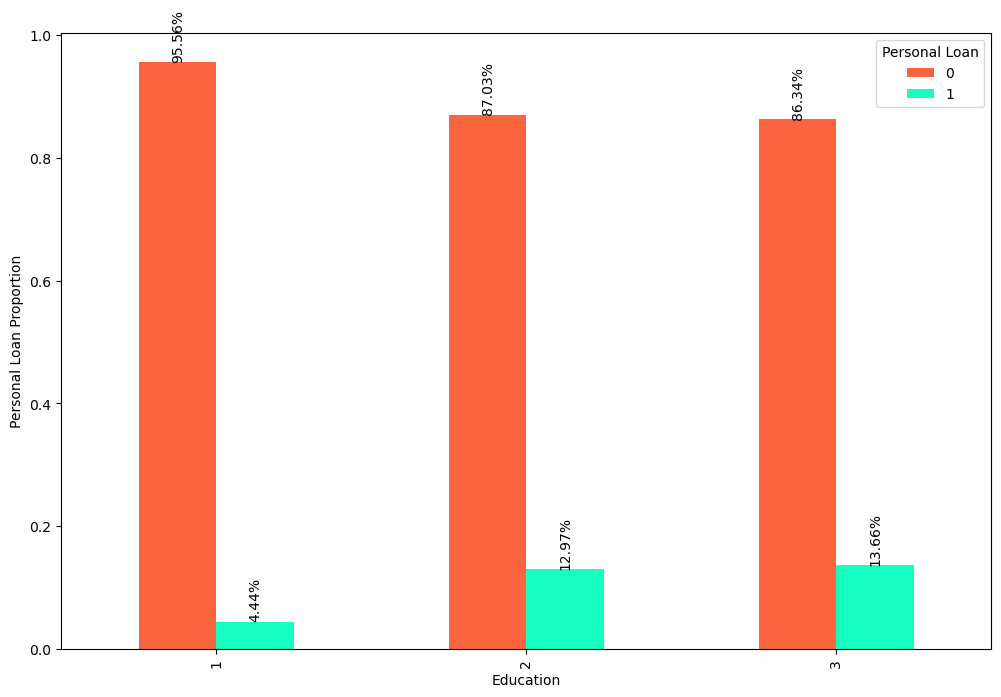

In [35]:
# calculate the percentage of each value for each Education Level
grouped_data = data.groupby('Education')['Personal Loan'].value_counts(normalize=True).unstack()

# creating colors to use for the color palette
colors = ['#FA643F', '#17FFC0']
cmap = sns.color_palette(colors)

# create the bar plot
ax = grouped_data.plot(kind='bar', figsize = (12, 8), color = colors)

# add percentage labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:.2%}'.format(j) for j in i.datavalues], rotation=90)

# set plot title and axis labels
#plt.title('Personal Loan by Education Level')
plt.xlabel('Education')
plt.ylabel('Personal Loan Proportion')
plt.legend(title='Personal Loan')
plt.savefig("images/Education_Loan.png", tight_layout = True)

# show the plot
plt.show()


**Insight**

Based on the plot, it is evident that clients with an Education Level of 1 have the lowest likelihood of accepting a loan offer, with only 4.44% acceptance rate, while clients with Education Levels 2 and 3 have higher acceptance rates at 12.97% and 13.66%, respectively. Therefore, targeting clients with Education Levels 2 and 3 would be a better strategy for increasing loan acceptance rates.

**INCOME**

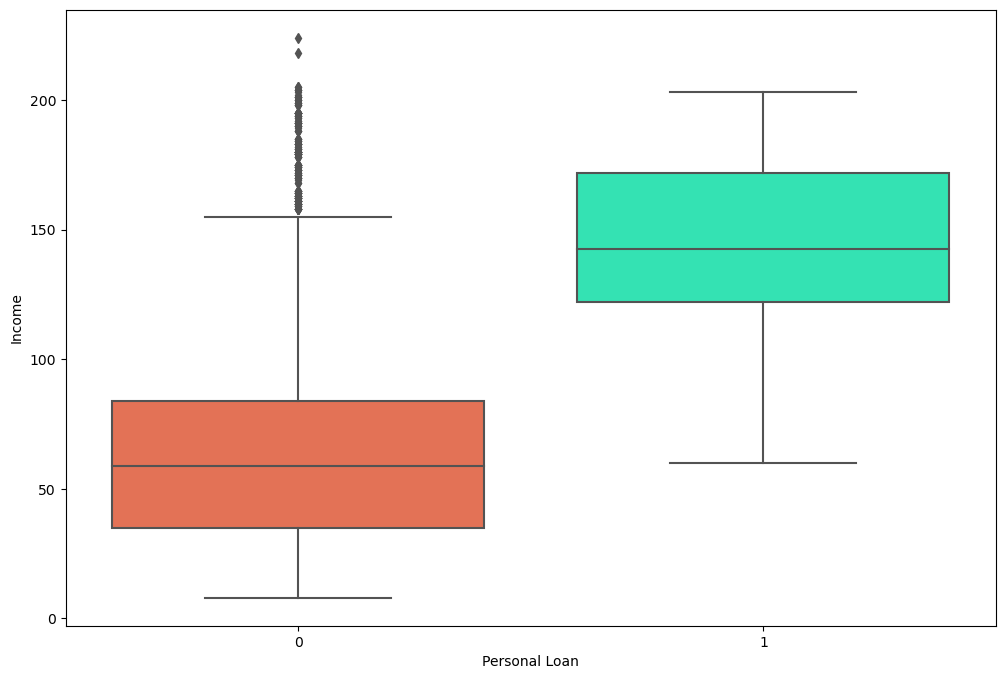

In [41]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = data, x= 'Personal Loan', y ='Income', palette = colors)
plt.savefig("images/Income-Loan.png", tight_layout = True)
plt.show()

**Insight**

The heatmap we previously plotted showed a correlation coefficient of 0.5 between income and the likelihood of accepting a personal loan, indicating a positive correlation. This suggests that customers with higher income are more likely to accept a loan offer from the bank. The box plot presented above further confirms this finding.

Customers with higher Income should be targeted.

**FAMILY SIZE**

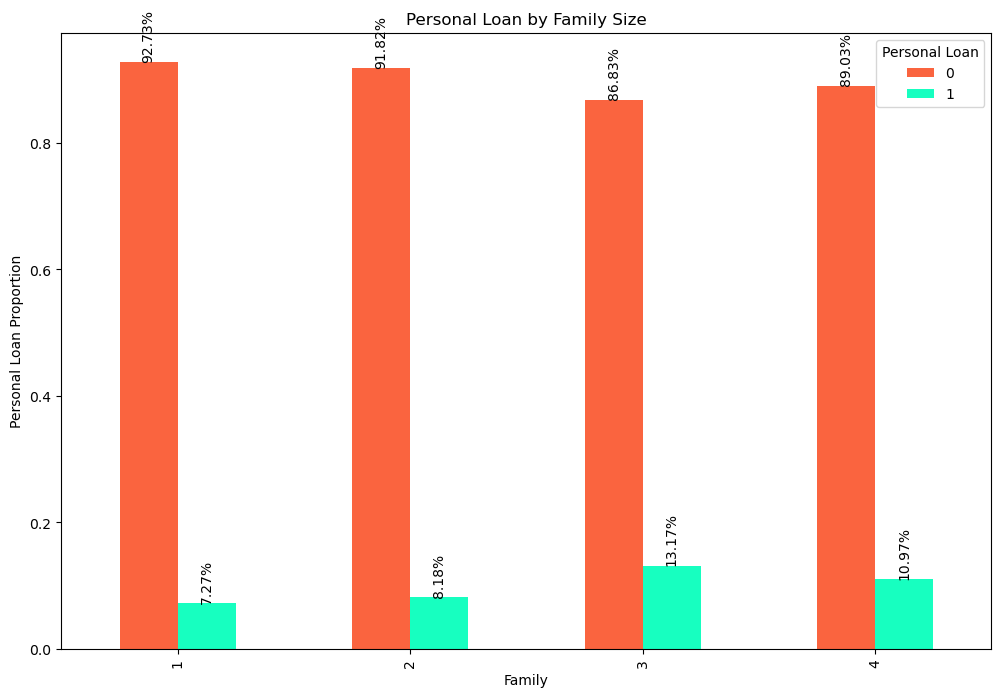

In [48]:
# calculate the percentage of each value for each Family Size
grouped_data = data.groupby('Family')['Personal Loan'].value_counts(normalize=True).unstack()


# create the bar plot
ax = grouped_data.plot(kind='bar', figsize = (12, 8), color = colors)

# add percentage labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:.2%}'.format(j) for j in i.datavalues], rotation=90)

# set plot title and axis labels
plt.title('Personal Loan by Family Size')
plt.xlabel('Family')
plt.ylabel('Personal Loan Proportion')
plt.legend(title='Personal Loan')
plt.savefig('images/FamilySize-Loan.png', tight_layout = True)

# show the plot
plt.show()

The plot shows that clients with a family size of 3 have the highest chance of accepting a loan offer, with a probability of 13.17%, while those with a family size of 1 have the lowest chance of acceptance of 7.27%. This may be because larger families have more financial responsibilities and may require more financial support, leading to a higher likelihood of accepting a loan offer.

**Experience**

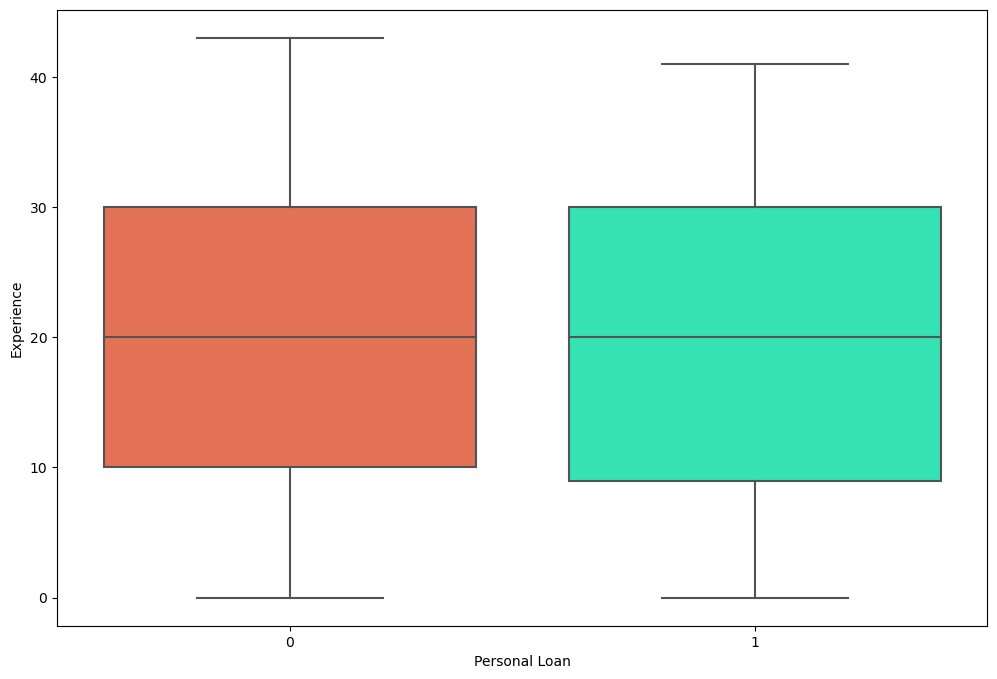

In [51]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = data, x= 'Personal Loan', y ='Experience', palette = colors)
plt.savefig("images/Experience-Loan.png", tight_layout = True)
plt.show()

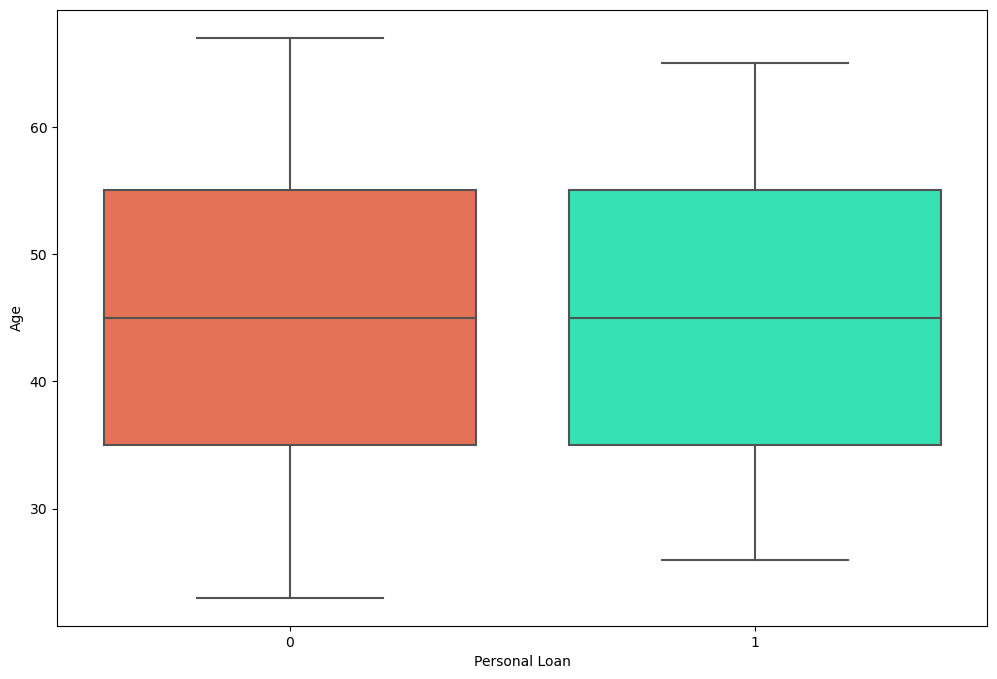

In [52]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = data, x= 'Personal Loan', y ='Age', palette = colors)
plt.savefig("images/Age-Loan.png", tight_layout = True)
plt.show()

**Region**

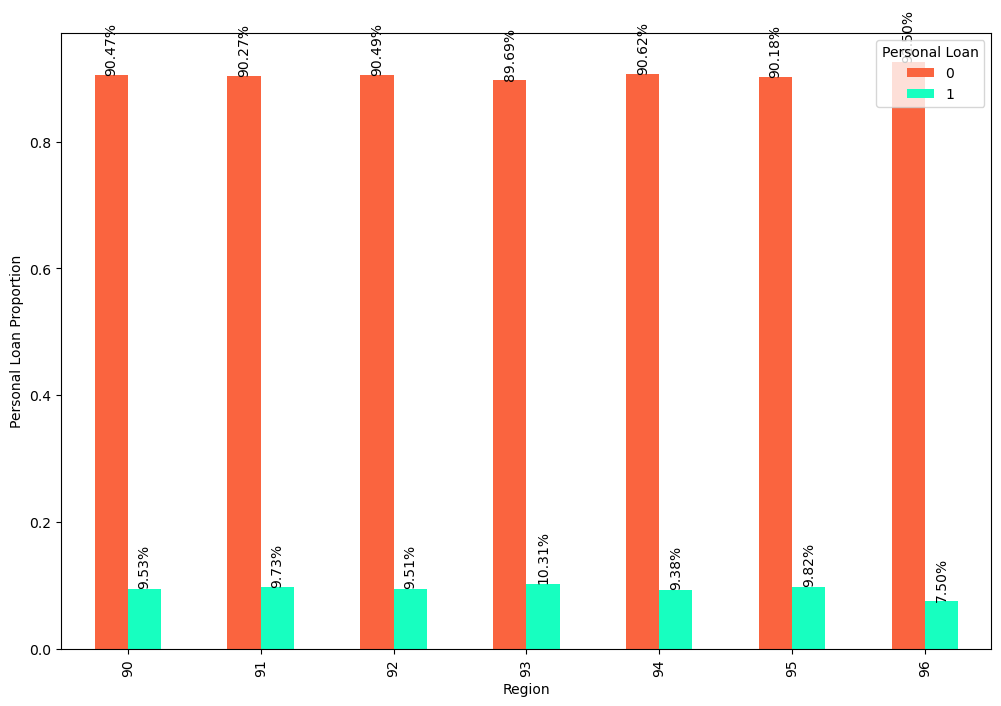

In [55]:
# calculate the percentage of each value for each Family Size
grouped_data = data.groupby('Region')['Personal Loan'].value_counts(normalize=True).unstack()


# create the bar plot
ax = grouped_data.plot(kind='bar', figsize = (12, 8), color = colors)

# add percentage labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:.2%}'.format(j) for j in i.datavalues], rotation=90)

# set plot title and axis labels
#plt.title('Personal Loan by Region')
plt.xlabel('Region')
plt.ylabel('Personal Loan Proportion')
plt.legend(title='Personal Loan')
plt.savefig('images/Region-Loan.png', tight_layout = True)

# show the plot
plt.show()

**Insight**

Although there is not a significant correlation between the customer's region and the Personal Loan Column, it is worth noting that clients with ZIP Code prefix of 93 have a higher likelihood of accepting a loan offer, with a conversion rate of over 10%. On the other hand, clients with ZIP Code prefix of 96 have the lowest conversion rate of 7.50%.

Therefore, it would be advisable to focus more on customers residing in areas with ZIP Code prefix of 93 when targeting clients for loan offers. In contrast, loan offers to clients from regions with ZIP Code prefix of 96 should be minimized as they have a significantly lower conversion rate compared to other regions.

### Part 5: communication

Please click this <a href = "https://www.canva.com/design/DAFeEUkmVE0/4005cs4QmwsFdTVCpJMVDQ/view">link</a> to check out the slides